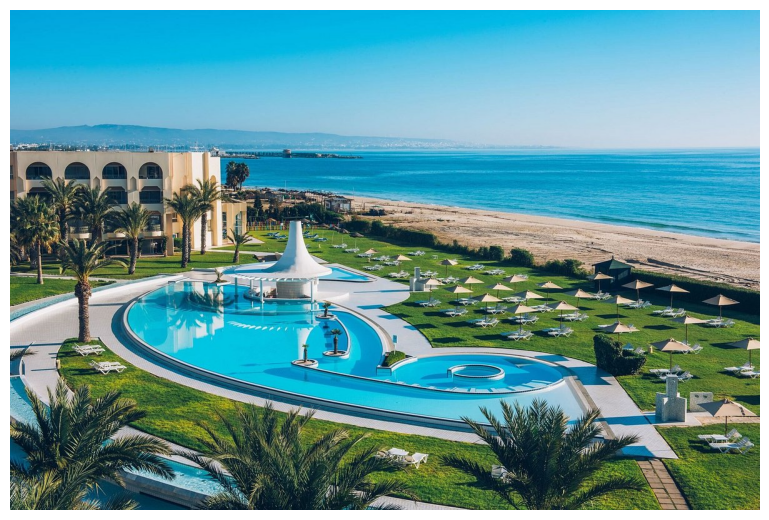

In [ ]:
# @title Hotel Booking Data Analysis
import matplotlib.pyplot as plt
img = plt.imread('/content/iberostar-averroes.jpg')
# Set the size of the figure to match the cell size
plt.figure(figsize=(12.5, 6.5))  # Adjust the figsize as needed
plt.axis('off')  # Turn off the axes
plt.imshow(img)

## Business Problem

In recent years, both city hotels and resort hotels have experienced a surge in cancellation rates, leading to a myriad of issues including reduced revenues and suboptimal utilization of hotel rooms. Lowering cancellation rates is imperative for maximizing revenue generation and optimizing hotel operations. Our goal is to analyze hotel booking cancellations and identify factors contributing to high cancellation rates. Subsequently, we aim to provide actionable business advice to address this issue effectively.





## Research Questions

1. **Variables Impacting Hotel Reservation Cancellations:**
   - What are the variables that significantly influence hotel reservation cancellations? Are there any patterns or trends in cancellation behavior that can be identified?

2. **Improving Hotel Reservations:**
   - How can hotel reservations be optimized to reduce cancellation rates and enhance overall booking experience?

3. **Assistance in Pricing and Promotional Decisions:**
   - How can hotels be assisted in making pricing and promotional decisions to maximize revenue while minimizing cancellations?


### Data Download and Exploration


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"safajazi","key":"48f0b8bbad08f2caa377c7dc0fc14d2a"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                             Apple Quality                                     170KB  2024-01-11 14:31:07          12070        277  1.0              
kanchana1990/2024-amazon-best-sellers-top-valentine-gifts  2024 Amazon Best Sellers: Top Valentine Gifts 🎯💘   25KB  2024-02-06 18:49:26            657         32  1.0              
hummaamqaasim/jobs-in-data                                 Jobs and Salaries in Data Science                  76KB  2023-12-25 20:03:32          16914        281  1.0              
shiivvvaam/top-youtuber-worldwide                          Top YouTubers Worldwide             

In [ ]:
!kaggle datasets download -d mojtaba142/hotel-booking

  0% 0.00/4.40M [00:00<?, ?B/s]
100% 4.40M/4.40M [00:00<00:00, 147MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/hotel-booking.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/hotel_booking.csv')

✅Importing Dataset from Kaggle

⏯Explore the data

In [ ]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
df.shape

(119390, 36)

In [ ]:
df['reservation_status_date'].dtype  # Object type

dtype('O')

In [ ]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.dtypes  # datetime

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [31]:
df.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [33]:
for col in df.describe(include=object).columns:
  print(col)
  print(df[col].unique())
  print("*"*50)

hotel
['Resort Hotel' 'City Hotel']
**************************************************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
**************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
**************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [34]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [35]:
df.drop(['agent','company'],axis=1,inplace=True)

In [36]:
df.dropna(inplace=True)

In [37]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [38]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

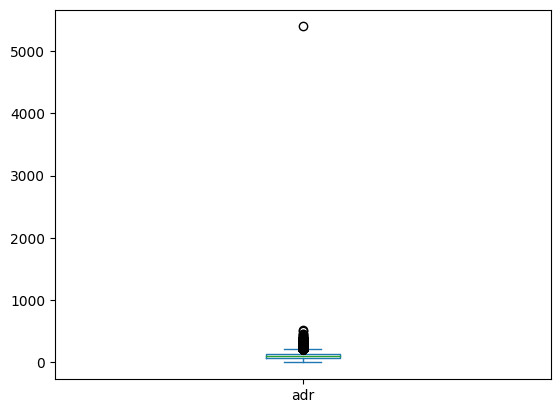

In [43]:
df['adr'].plot(kind='box')

In [44]:
df=df[df['adr']<5000]

### Data Analysis

In [51]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)*100
cancelled_perc

0    62.865337
1    37.134663
Name: is_canceled, dtype: float64

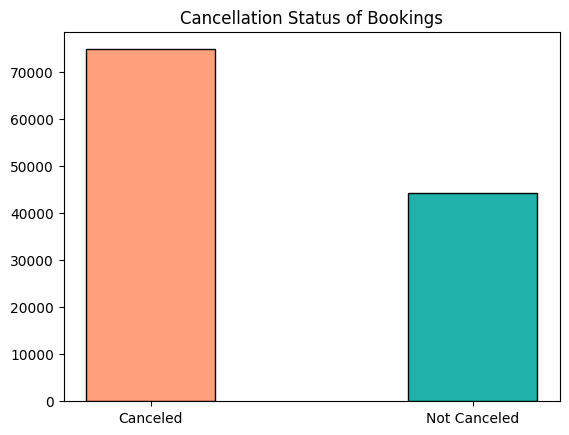

In [68]:
plt.bar(['Canceled', 'Not Canceled'], df['is_canceled'].value_counts(), width=0.4, color=['#FFA07A', '#20B2AA'], edgecolor='k')
plt.title('Cancellation Status of Bookings')
# Save the plot to a file
plt.savefig('cancellation_status_plot.png')
plt.show()

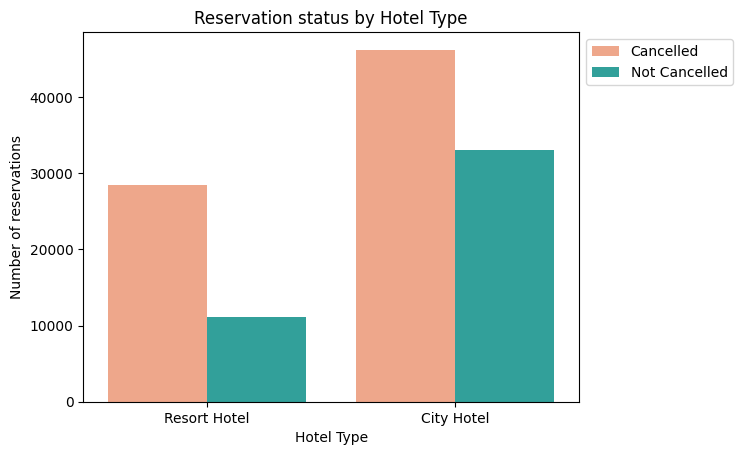

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
# Define custom colors
custom_palette = ['#FFA07A', '#20B2AA']

# Create the count plot with custom colors and legend labels
ax = sns.countplot(x='hotel', hue='is_canceled', data=df, palette=custom_palette)

# Get the legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Add legend with custom labels
ax.legend(handles=handles, labels=['Cancelled', 'Not Cancelled'], bbox_to_anchor=(1,1))

# Add labels and title
plt.xlabel('Hotel Type')
plt.ylabel('Number of reservations')
plt.title('Reservation status by Hotel Type')
# Save the plot to a file
plt.savefig('Cancellation Status by Hotel Type.png')
# Show the plot
plt.show()

In [76]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [77]:
City_hotel=df[df['hotel']=='City Hotel']
City_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [83]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=City_hotel.groupby('reservation_status_date')[['adr']].mean()

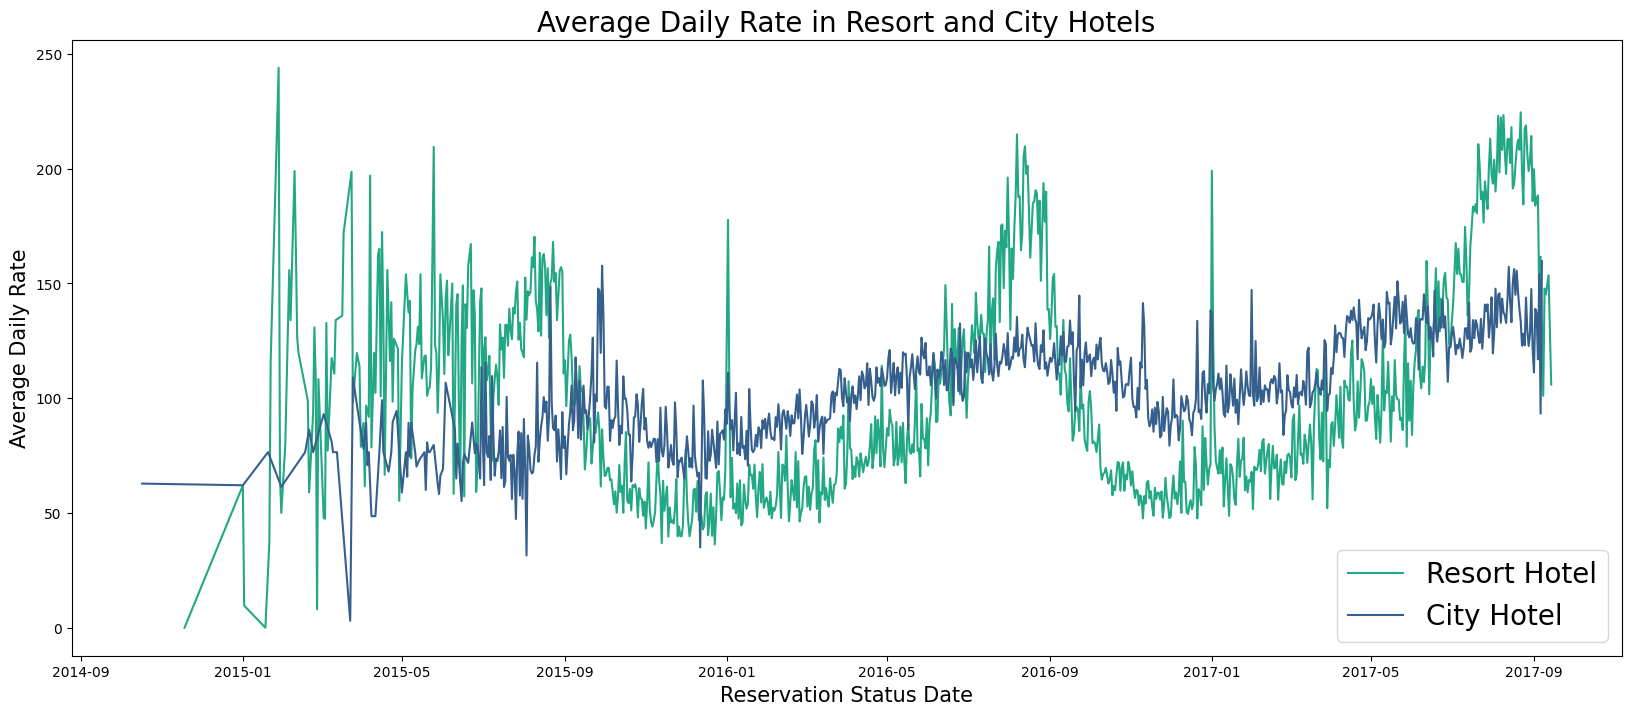

In [93]:
# Create a figure with custom size
plt.figure(figsize=(20, 8))
# Define a color map
cmap = plt.get_cmap('viridis')
# Plot the average daily rate for resort hotels
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel', color=cmap(0.6))

# Plot the average daily rate for city hotels
plt.plot(city_hotel.index, city_hotel['adr'], label='City Hotel',  color=cmap(0.3))

# Add labels and title
plt.xlabel('Reservation Status Date', fontsize=15)
plt.ylabel('Average Daily Rate', fontsize=15 )
plt.title('Average Daily Rate in Resort and City Hotels',fontsize=20)

# Add legend with custom font size
plt.legend(fontsize=20)
# Save the plot to a file
plt.savefig('Average Daily Rate in Resort and City Hotels')
# Show the plot
plt.show()

In [94]:
df['month']=df['reservation_status_date'].dt.month

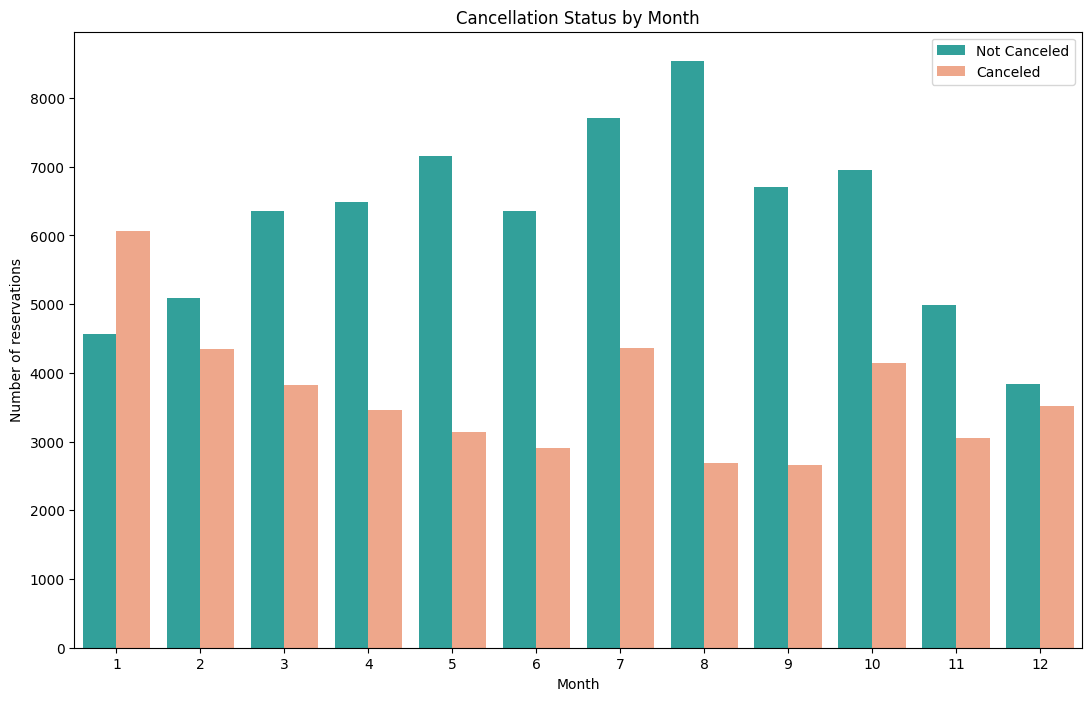

In [102]:
# Create a count plot using seaborn
plt.figure(figsize=(13, 8))
custom_palette = ['#20B2AA','#FFA07A']
ax1 = sns.countplot(x='month', hue='is_canceled', data=df,palette=custom_palette)
# Add legend with custom labels
plt.legend(['Not Canceled', 'Canceled'])

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Number of reservations')
plt.title('Cancellation Status by Month')
# Save the plot to a file
plt.savefig('Cancellation Status by Month')
# Show the plot
plt.show()

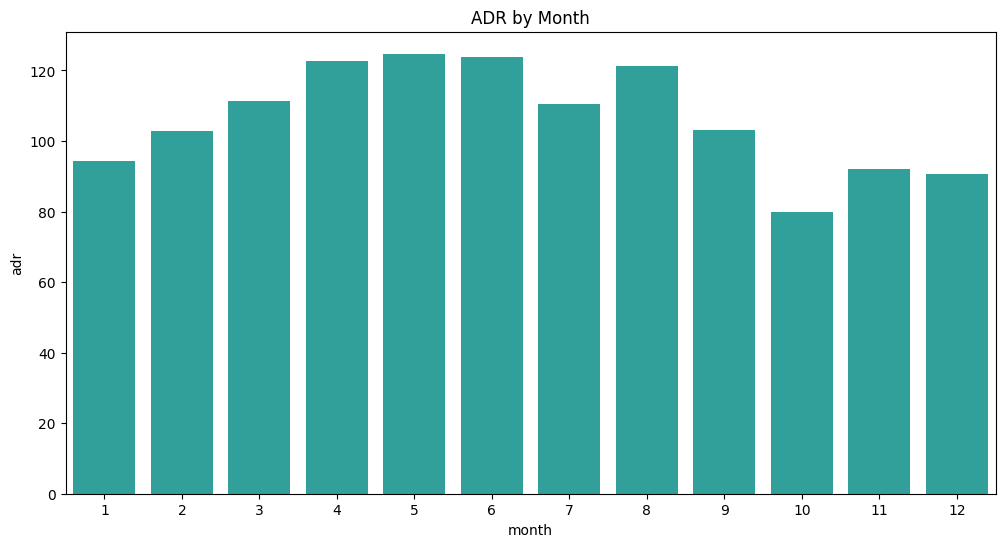

In [114]:
# Group the data by month, calculate the mean of 'adr', and filter for canceled bookings
canceled_adr_monthly = df[df['is_canceled'] == 1].groupby('month')['adr'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.title('ADR by Month')
# Create a bar plot using seaborn
sns.barplot(x='month', y='adr', data=canceled_adr_monthly,color='#20B2AA')
# Show the plot
# Save the plot to a file
plt.savefig('ADR by Month')
plt.show()

In [115]:
cancelled_data=df[df['is_canceled']==1]
top_10_countries=cancelled_data['country'].value_counts()[:10]

<Figure size 1200x600 with 0 Axes>

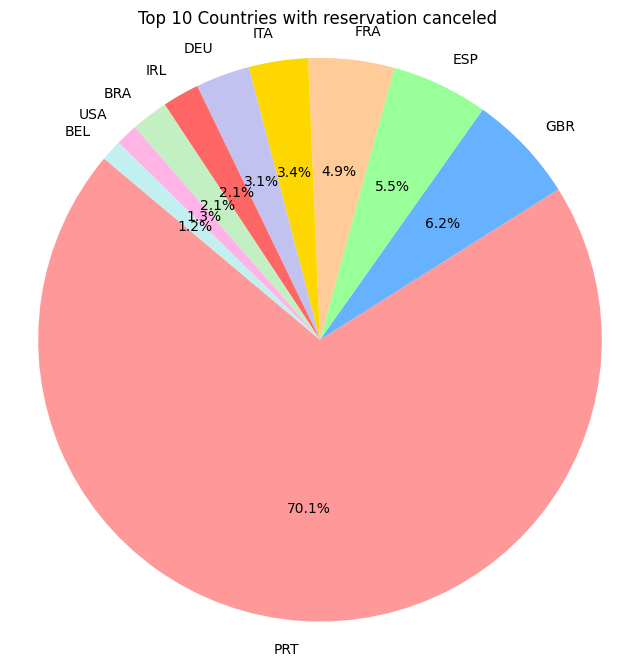

In [120]:
# Define custom colors for the pie chart
custom_colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#C2C2F0', '#FF6666', '#c2f0c2', '#ffb3e6', '#c2f0f0']
plt.figure(figsize=(12, 6))
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Top 10 Countries with reservation canceled ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# Save the plot to a file
plt.savefig('Distribution of Canceled Bookings')
# Show the plot
plt.show()

In [121]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [122]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

In [123]:
not_cancelled_data=df[df['is_canceled']==0]

In [127]:
canceled_df_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date',inplace=True)
not_canceled_df_adr=not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date',inplace=True)

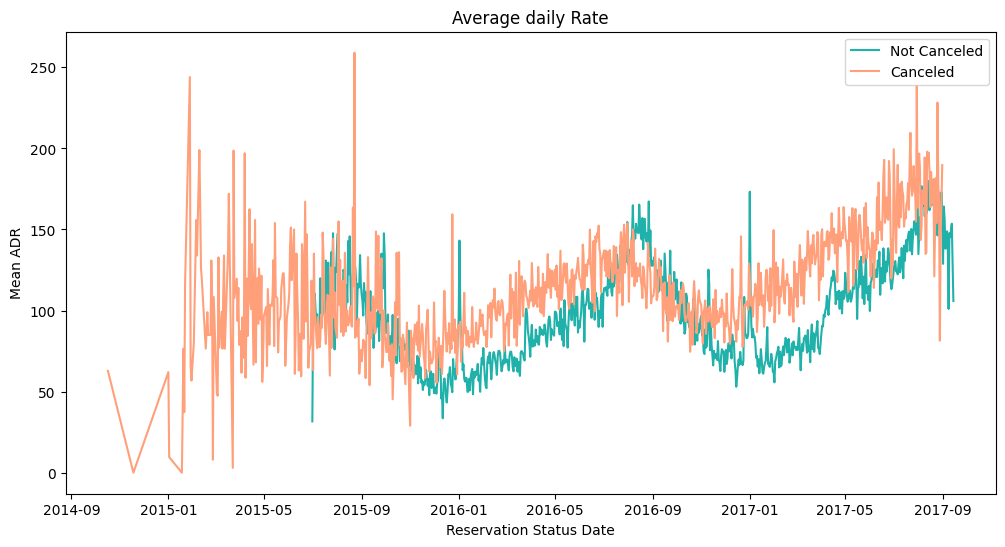

In [133]:
# Plot the mean ADR over time for not canceled bookings
custom_palette = ['#FFA07A', '#20B2AA']
plt.figure(figsize=(12, 6))
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label='Not Canceled',color=custom_palette[1])
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label='Canceled',color=custom_palette[0])
# Add labels and title
plt.xlabel('Reservation Status Date')
plt.ylabel('Mean ADR')
plt.title('Average daily Rate')
# Save the plot to a file
plt.savefig('Average daily Rate')
# Add legend
plt.legend()

# Show the plot
plt.show()
